In [4]:
import torch
import torchvision
from torch import nn
import torch.optim as optim
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch.nn.functional as F

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report


In [5]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device : {device}")

Using device : cuda


In [6]:
# load the MNIST dataset

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)




100%|██████████| 9.91M/9.91M [00:02<00:00, 4.80MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 126kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.20MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.41MB/s]


In [7]:
# visualize some images

def show_images(images, labels, label_header="True"):
  figure = plt.figure(figsize=(10,10))
  rows, cols = 5,5
  for i in range(1, rows*cols+1):
    figure.add_subplot(rows, cols, i)
    plt.axis(False)
    plt.title(f"{label_header}: {labels[i-1].item()}")
    plt.imshow(images[i-1].permute(1,2,0), cmap="gray")

  plt.show()

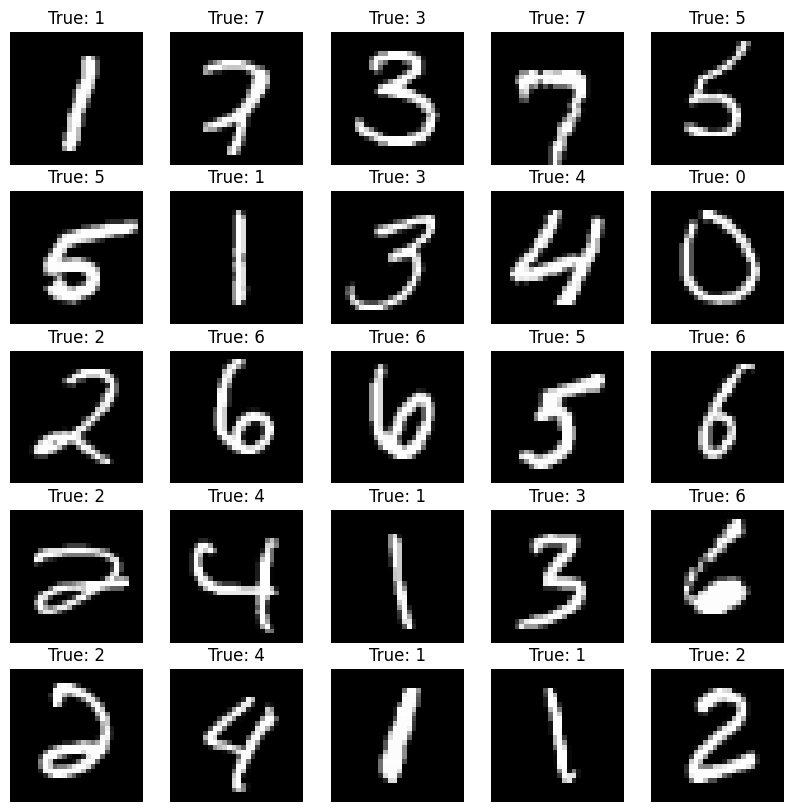

In [8]:
images, labels = next(iter(trainloader))
show_images(images, labels)

In [9]:
class CNN(nn.Module):
  def __init__(self, in_channels, num_classes=10):

    super().__init__()

    self.conv1 = nn.Conv2d(in_channels = in_channels,out_channels=8, kernel_size=3, stride=1, padding=1)

    self.pool = nn.MaxPool2d(kernel_size =2, stride = 2)

    self.conv2 = nn.Conv2d(8, 16, kernel_size=3,stride=1, padding = 1)

    self.fc1 = nn.Linear(16 * 7* 7 , num_classes)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fc1(x)

    return x

In [10]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device : {device}")

Using device : cuda


In [11]:
# hyperparameters

input_size = 784
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 50

In [12]:
# Initilaize the model, loss function and optimizer

model = CNN(in_channels =1, num_classes = num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [13]:

num_epochs = 50
loss_values_train = []

for epoch in range(num_epochs):

    running_loss = 0.0

    for batch_idx, (data, targets) in enumerate(trainloader):

        data = data.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Add batch loss
        running_loss += loss.item()

    # Calculate average loss for this epoch
    epoch_loss = running_loss / len(trainloader)

    # Store in list
    loss_values_train.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")

print("Training Complete")


Epoch [1/50] Loss: 0.3231
Epoch [2/50] Loss: 0.0952
Epoch [3/50] Loss: 0.0725
Epoch [4/50] Loss: 0.0614
Epoch [5/50] Loss: 0.0537
Epoch [6/50] Loss: 0.0490
Epoch [7/50] Loss: 0.0441
Epoch [8/50] Loss: 0.0408
Epoch [9/50] Loss: 0.0372
Epoch [10/50] Loss: 0.0345
Epoch [11/50] Loss: 0.0319
Epoch [12/50] Loss: 0.0296
Epoch [13/50] Loss: 0.0279
Epoch [14/50] Loss: 0.0272
Epoch [15/50] Loss: 0.0247
Epoch [16/50] Loss: 0.0238
Epoch [17/50] Loss: 0.0220
Epoch [18/50] Loss: 0.0204
Epoch [19/50] Loss: 0.0192
Epoch [20/50] Loss: 0.0194
Epoch [21/50] Loss: 0.0177
Epoch [22/50] Loss: 0.0159
Epoch [23/50] Loss: 0.0161
Epoch [24/50] Loss: 0.0146
Epoch [25/50] Loss: 0.0141
Epoch [26/50] Loss: 0.0128
Epoch [27/50] Loss: 0.0119
Epoch [28/50] Loss: 0.0125
Epoch [29/50] Loss: 0.0110
Epoch [30/50] Loss: 0.0104
Epoch [31/50] Loss: 0.0095
Epoch [32/50] Loss: 0.0089
Epoch [33/50] Loss: 0.0089
Epoch [34/50] Loss: 0.0090
Epoch [35/50] Loss: 0.0078
Epoch [36/50] Loss: 0.0076
Epoch [37/50] Loss: 0.0073
Epoch [38/

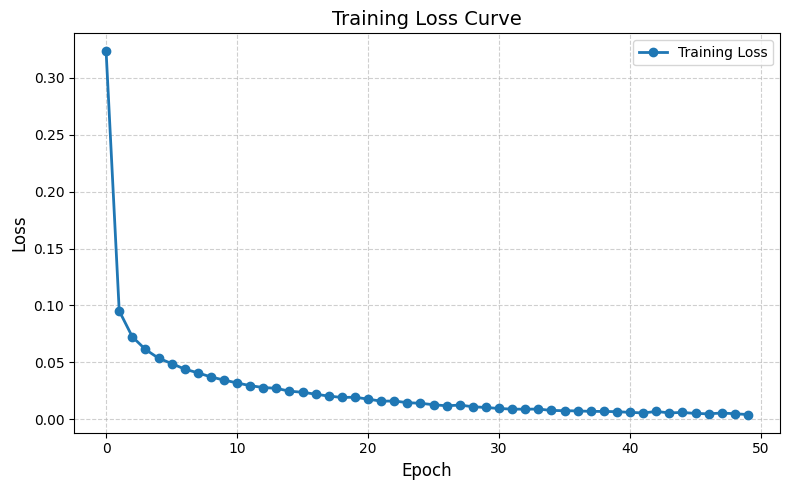

In [15]:
plt.figure(figsize=(8, 5))

plt.plot(loss_values_train,
         marker='o',
         linestyle='-',
         linewidth=2)

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training Loss Curve", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(["Training Loss"])

plt.tight_layout()
plt.show()


In [16]:


model.eval()

y_train = []
y_predtrain = []

with torch.no_grad():
    for data, targets in trainloader:

        data = data.to(device)
        targets = targets.to(device)

        outputs = model(data)

        # Get predicted class
        _, predictions = torch.max(outputs, 1)

        y_train.extend(targets.cpu().numpy())
        y_predtrain.extend(predictions.cpu().numpy())

# Accuracy
accuracy = accuracy_score(y_train, y_predtrain)
print("Train Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_train, y_predtrain))



Train Accuracy: 0.99805

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       0.99      1.00      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       1.00      0.99      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      1.00      1.00      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



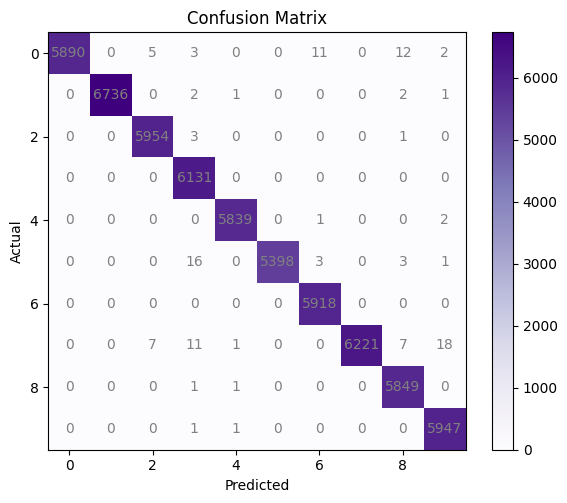

In [17]:

# Create confusion matrix
cm = confusion_matrix(y_train, y_predtrain)

plt.figure(figsize=(6, 5))

# Purple color theme
plt.imshow(cm, cmap="Purples")

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.colorbar()

# Add white numbers inside boxes
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center",
                 va="center",
                 color="grey")

plt.tight_layout()
plt.show()


In [18]:

num_epochs = 50
loss_values = []

for epoch in range(num_epochs):

    running_loss = 0.0

    for batch_idx, (data, targets) in enumerate(testloader):

        data = data.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Add batch loss
        running_loss += loss.item()

    # Calculate average loss for this epoch
    epoch_loss = running_loss / len(testloader)

    # Store in list
    loss_values.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")

print("Testing Complete")


Epoch [1/50] Loss: 0.0875
Epoch [2/50] Loss: 0.0334
Epoch [3/50] Loss: 0.0165
Epoch [4/50] Loss: 0.0074
Epoch [5/50] Loss: 0.0042
Epoch [6/50] Loss: 0.0026
Epoch [7/50] Loss: 0.0018
Epoch [8/50] Loss: 0.0014
Epoch [9/50] Loss: 0.0011
Epoch [10/50] Loss: 0.0009
Epoch [11/50] Loss: 0.0008
Epoch [12/50] Loss: 0.0007
Epoch [13/50] Loss: 0.0006
Epoch [14/50] Loss: 0.0005
Epoch [15/50] Loss: 0.0005
Epoch [16/50] Loss: 0.0004
Epoch [17/50] Loss: 0.0004
Epoch [18/50] Loss: 0.0004
Epoch [19/50] Loss: 0.0003
Epoch [20/50] Loss: 0.0003
Epoch [21/50] Loss: 0.0003
Epoch [22/50] Loss: 0.0002
Epoch [23/50] Loss: 0.0002
Epoch [24/50] Loss: 0.0002
Epoch [25/50] Loss: 0.0002
Epoch [26/50] Loss: 0.0002
Epoch [27/50] Loss: 0.0002
Epoch [28/50] Loss: 0.0001
Epoch [29/50] Loss: 0.0001
Epoch [30/50] Loss: 0.0001
Epoch [31/50] Loss: 0.0001
Epoch [32/50] Loss: 0.0001
Epoch [33/50] Loss: 0.0001
Epoch [34/50] Loss: 0.0001
Epoch [35/50] Loss: 0.0001
Epoch [36/50] Loss: 0.0001
Epoch [37/50] Loss: 0.0001
Epoch [38/

In [19]:


model.eval()

y_test = []
y_predtest = []

with torch.no_grad():
    for data, targets in testloader:

        data = data.to(device)
        targets = targets.to(device)

        outputs = model(data)

        # Get predicted class
        _, predictions = torch.max(outputs, 1)

        y_test.extend(targets.cpu().numpy())
        y_predtest.extend(predictions.cpu().numpy())

# Accuracy
accuracy = accuracy_score(y_test, y_predtest)
print("Test Accuracy:", accuracy)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_predtest))



Test Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       1.00      1.00      1.00       892
           6       1.00      1.00      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      1.00      1.00       974
           9       1.00      1.00      1.00      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



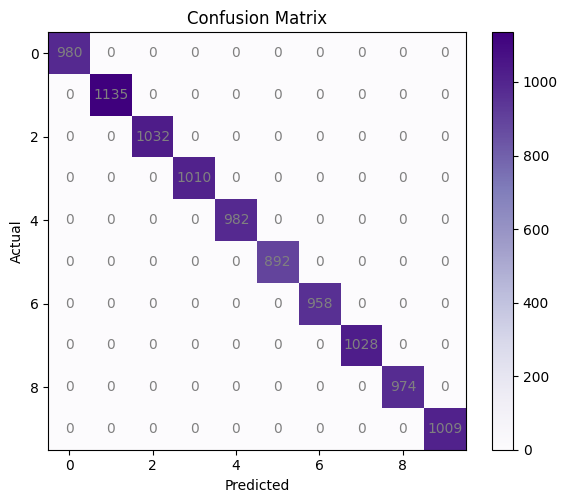

In [20]:


# Create confusion matrix
cm = confusion_matrix(y_test, y_predtest)

plt.figure(figsize=(6, 5))

# Purple color theme
plt.imshow(cm, cmap="Purples")

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.colorbar()

# Add white numbers inside boxes
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 ha="center",
                 va="center",
                 color="grey")

plt.tight_layout()
plt.show()


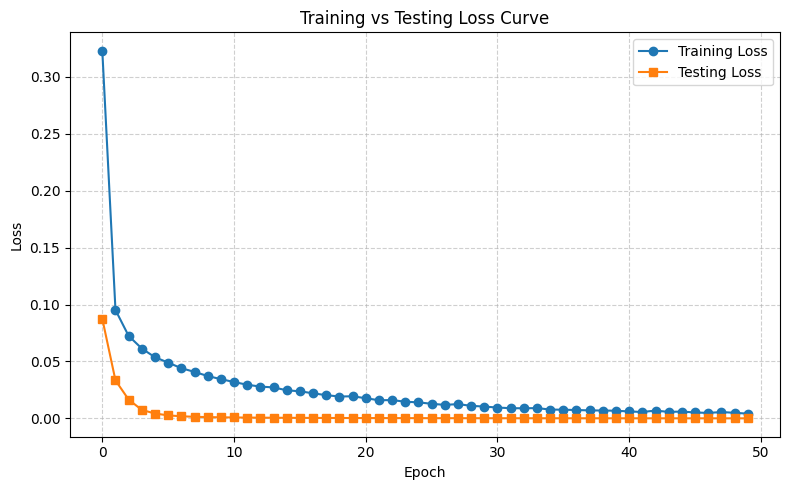

In [21]:


plt.figure(figsize=(8, 5))

plt.plot(loss_values_train, marker='o', label="Training Loss")
plt.plot(loss_values, marker='s', label="Testing Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss Curve")

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()
